In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-boston-houseprice-data/boston.csv


In [2]:
df =pd.read_csv('/kaggle/input/the-boston-houseprice-data/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

**Visualize the data**

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

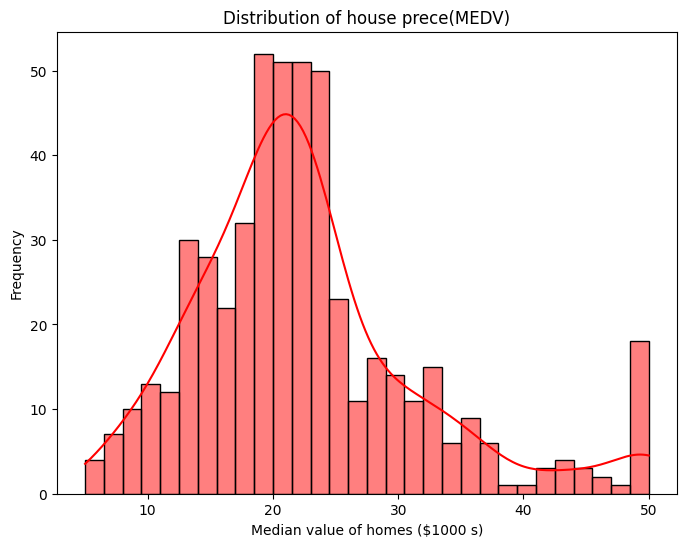

In [9]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,6))
sns.histplot(df['MEDV'],bins=30,kde=True,color='red',edgecolor='black')
plt.title('Distribution of house prece(MEDV)')
plt.xlabel('Median value of homes ($1000 s)')
plt.ylabel('Frequency')
plt.show()

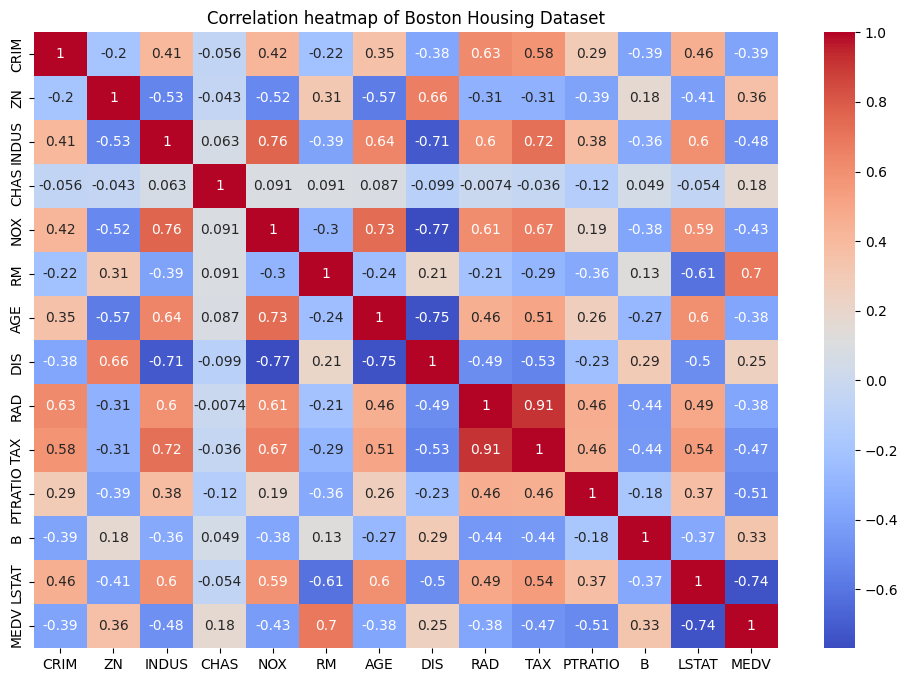

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='.2g')
plt.title('Correlation heatmap of Boston Housing Dataset')
plt.show()

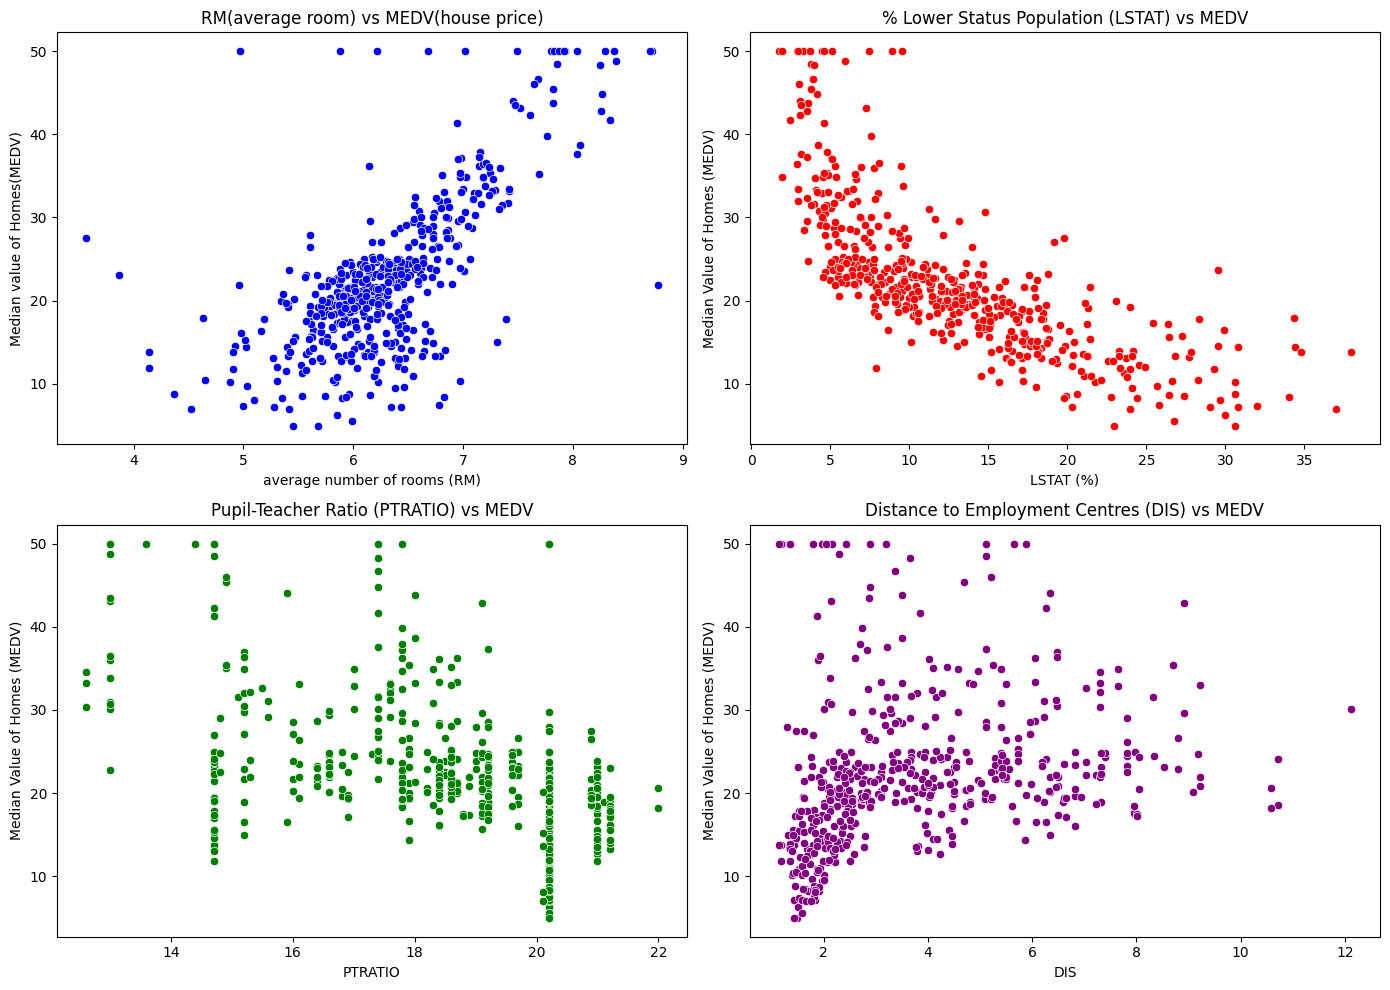

In [11]:
plt.figure(figsize=(14,10))

#RM vs MEDV
plt.subplot(2,2,1)
sns.scatterplot(x='RM',y='MEDV',data=df,color='blue')
plt.title('RM(average room) vs MEDV(house price)')
plt.xlabel('average number of rooms (RM)')
plt.ylabel('Median value of Homes(MEDV)')

#RM vs MEDV
plt.subplot(2,2,2)
sns.scatterplot(x='LSTAT',y='MEDV',data=df,color='red')
plt.title('% Lower Status Population (LSTAT) vs MEDV')
plt.xlabel('LSTAT (%)')
plt.ylabel('Median Value of Homes (MEDV)')

#PTRATION VS MEDV
plt.subplot(2,2,3)
sns.scatterplot(x='PTRATIO',y='MEDV',data=df,color='green')
plt.title('Pupil-Teacher Ratio (PTRATIO) vs MEDV')
plt.xlabel('PTRATIO')
plt.ylabel('Median Value of Homes (MEDV)')

#DIS VS MEDV
plt.subplot(2,2,4)
sns.scatterplot(x='DIS',y='MEDV',data=df,color='purple')
plt.title('Distance to Employment Centres (DIS) vs MEDV')
plt.xlabel('DIS')
plt.ylabel('Median Value of Homes (MEDV)')

plt.tight_layout()
plt.show()


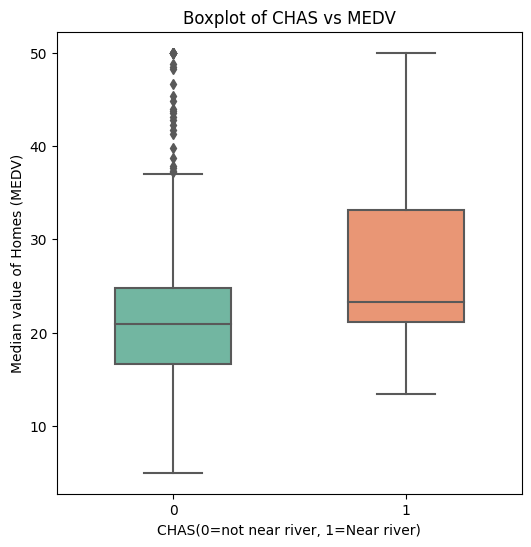

In [12]:
plt.figure(figsize=(6,6))
sns.boxplot(x='CHAS',y='MEDV',data=df,palette='Set2',width=0.5)
plt.title('Boxplot of CHAS vs MEDV')
plt.xlabel('CHAS(0=not near river, 1=Near river)')
plt.ylabel('Median value of Homes (MEDV)')
plt.show()

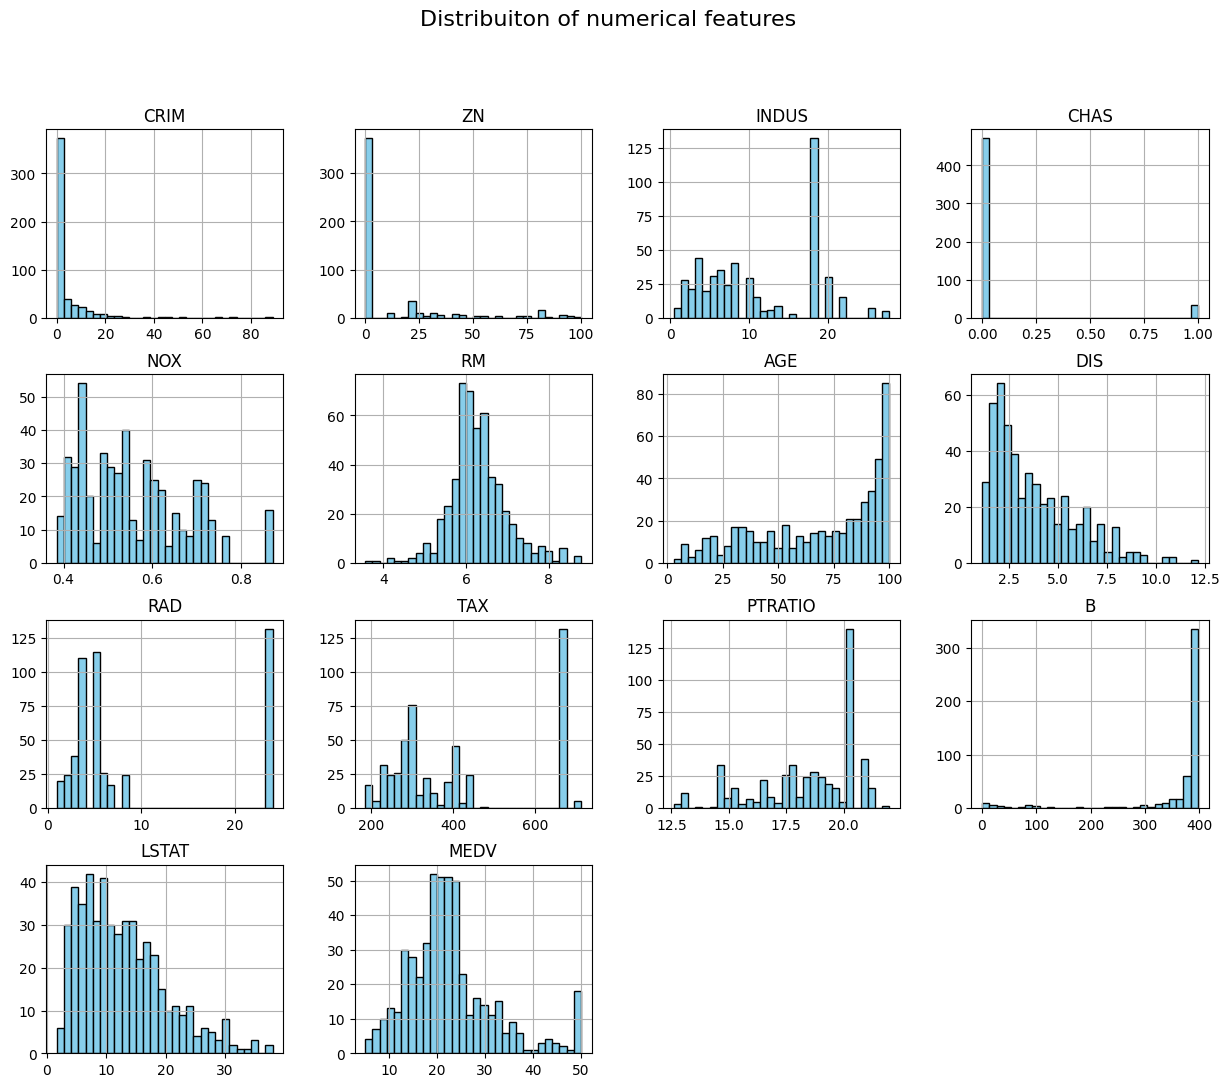

In [13]:
df.hist(bins=30,figsize=(15,12),color='skyblue',edgecolor='black')
plt.suptitle('Distribuiton of numerical features',fontsize=16)
plt.show()

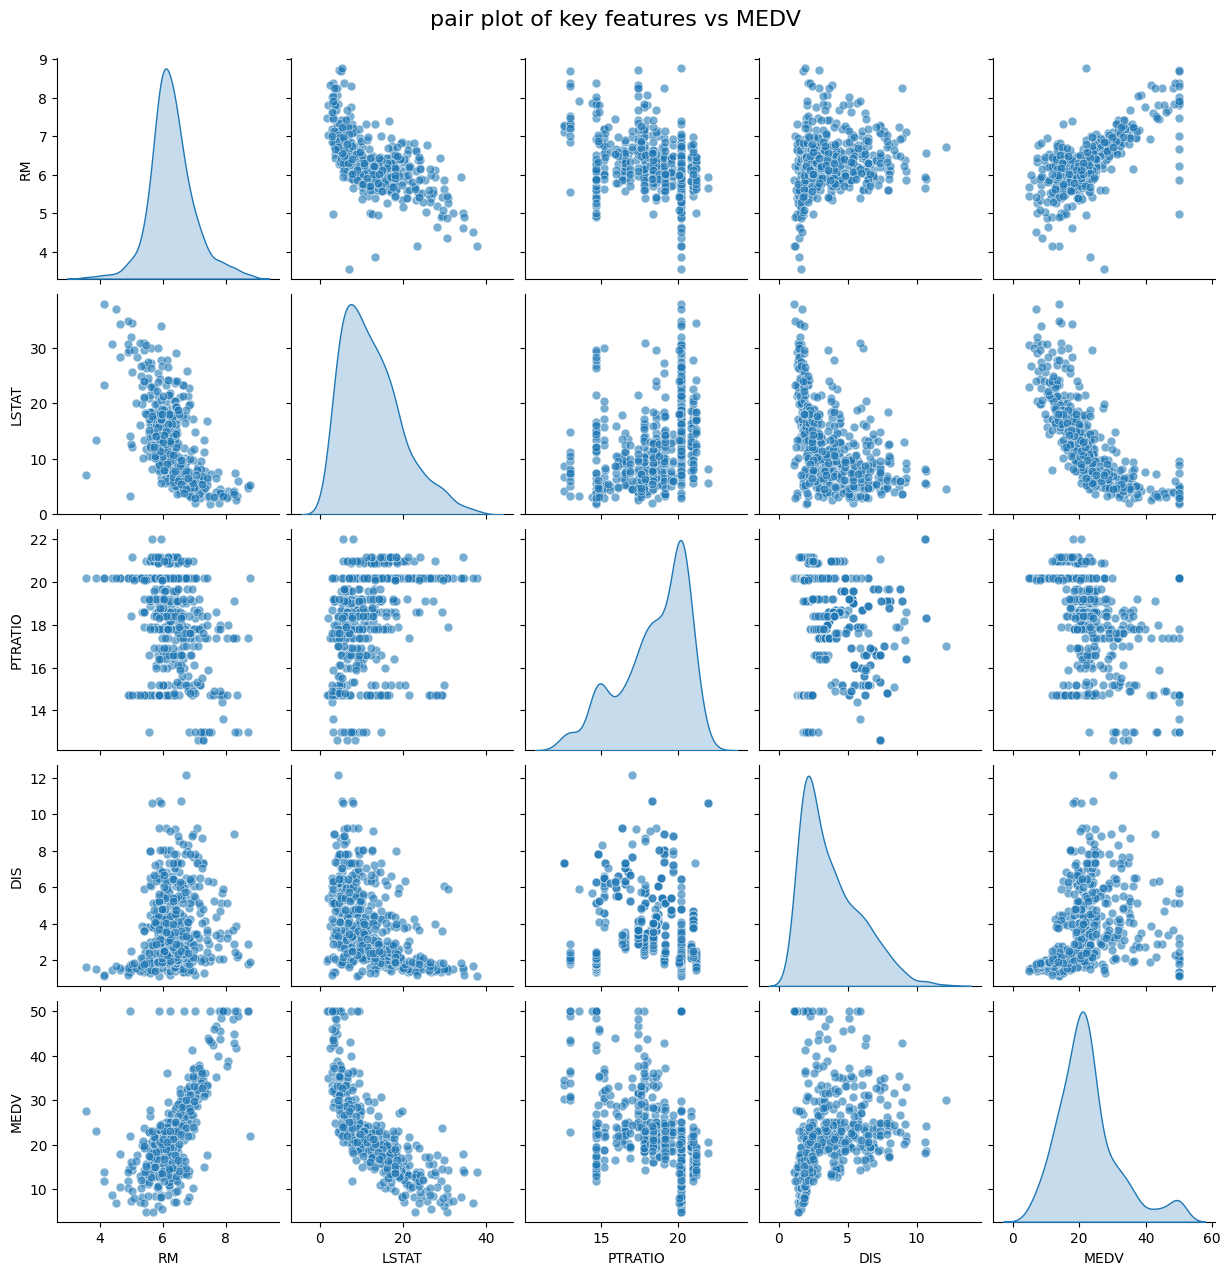

In [14]:
features=['RM', 'LSTAT', 'PTRATIO', 'DIS', 'MEDV']
sns.pairplot(df[features],diag_kind='kde',plot_kws={'alpha':0.6, 's':40})
plt.suptitle('pair plot of key features vs MEDV',y=1.02,fontsize=16)
plt.show()

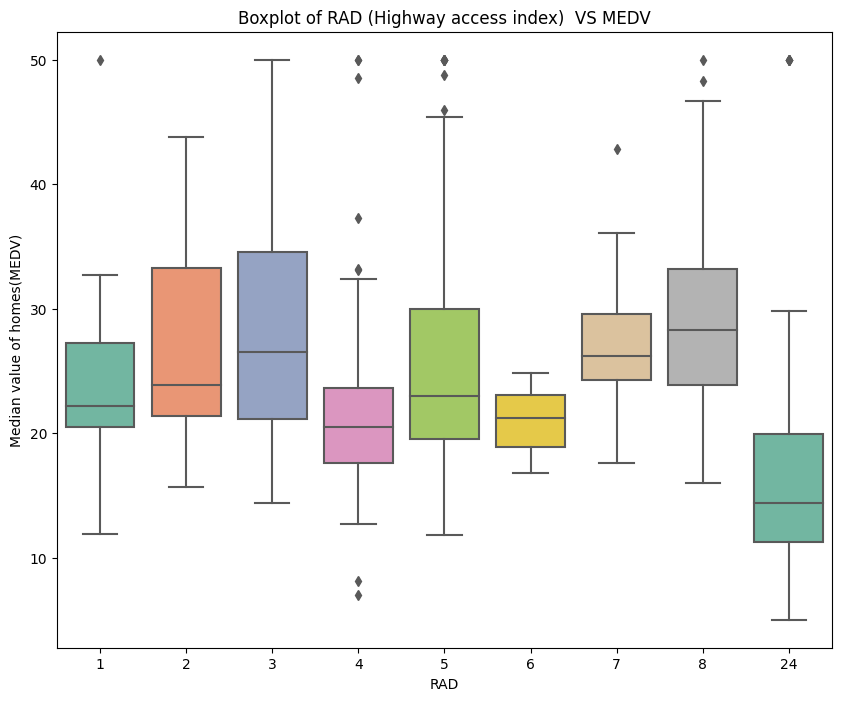

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(x='RAD',y='MEDV',data=df,palette='Set2')
plt.title('Boxplot of RAD (Highway access index)  VS MEDV')
plt.xlabel('RAD')
plt.ylabel('Median value of homes(MEDV)')
plt.show()

**Split features and target**

In [16]:
x=df.drop('MEDV',axis=1)   # INPUT FEATURES 
y=df['MEDV']               #TARGET/OUTPUT VARIABLES 

**Split into train and test data**

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

**USE Linear Regression**

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred=model.predict(x_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [23]:
print('Mean absolute error:',round(mae,2))
print('Mean squared error:',round(mse,2))
print('R2 score:',round(r2,2))

Mean absolute error: 3.85
Mean squared error: 27.41
R2 score: 0.63


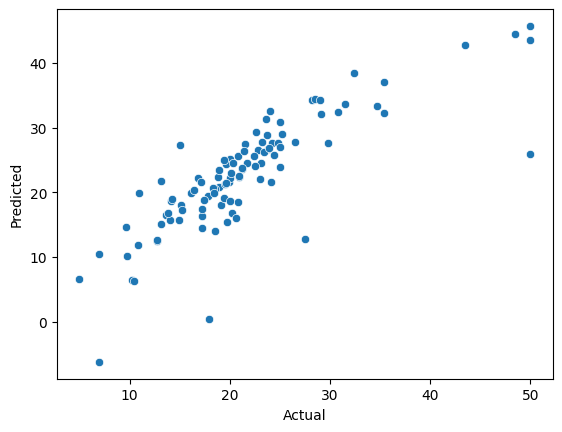

In [24]:
sns.scatterplot(x=y_test,y=y_pred,)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

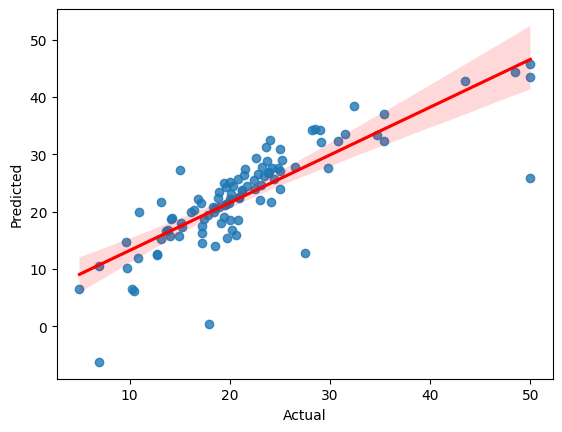

In [25]:
sns.regplot(x=y_test, y=y_pred,  line_kws={'color':'red'})
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [26]:
print('slope (m):',model.coef_)
print('Intercept(b):',model.intercept_)

slope (m): [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]
Intercept(b): 22.796534653465343


In [27]:
#Ridge regression 
from sklearn.linear_model import Ridge

#create Ridge model 
ridge=Ridge(alpha=100)  # alpha = regularization strength 
ridge.fit(x_train_scaled,y_train)

y_pred=ridge.predict(x_test_scaled)

#evalution 
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print('Mean absolute error:',round(mae,2))
print('Mean squared error:',round(mse,2))
print('R2 score:',round(r2,2))

Mean absolute error: 3.81
Mean squared error: 27.27
R2 score: 0.63


In [28]:
#Lasso regression 
from sklearn.linear_model import Lasso

#create lasso model 
lasso =Lasso(alpha=1.0)
lasso.fit(x_train_scaled,y_train)

y_pred=lasso.predict(x_test_scaled)

 
#evalution 
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print('Mean absolute error:',round(mae,2))
print('Mean squared error:',round(mse,2))
print('R2 score:',round(r2,2))

Mean absolute error: 3.96
Mean squared error: 28.84
R2 score: 0.61


**USE GRIDSEARCHCV FOR FINDING BEST ALPHA**

In [29]:
from sklearn.model_selection import GridSearchCV

params={'alpha':[0.01,0.1,1,10,100]}
ridge=Ridge()
grid=GridSearchCV(ridge,params,scoring='r2',cv=5)
grid.fit(x_train_scaled,y_train)

print("Best Alpha for Ridge:", grid.best_params_)
print("Best R2 Score:", grid.best_score_)

Best Alpha for Ridge: {'alpha': 1}
Best R2 Score: 0.724514155284955


In [30]:
from sklearn.model_selection import GridSearchCV

params={'alpha':[0.01,0.1,1,10,100]}
lasso=Lasso()
grid=GridSearchCV(lasso,params,scoring='r2',cv=5)
grid.fit(x_train_scaled,y_train)

print("Best Alpha for Lasso:", grid.best_params_)
print("Best R2 Score:", grid.best_score_)

Best Alpha for Lasso: {'alpha': 0.01}
Best R2 Score: 0.7241453136360594


**USE SUPPORT VECTOR REGRESSOR**

In [31]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf', C=200, gamma=0.01, epsilon=0.01)
svr.fit(x_train_scaled,y_train)

#predict 
y_pred=svr.predict(x_test_scaled)

#evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", round(mae, 2))
print("Mean Squared Error:", round(mse, 2))
print("R2 Score:", round(r2, 2))

Mean Absolute Error: 2.45
Mean Squared Error: 13.41
R2 Score: 0.82


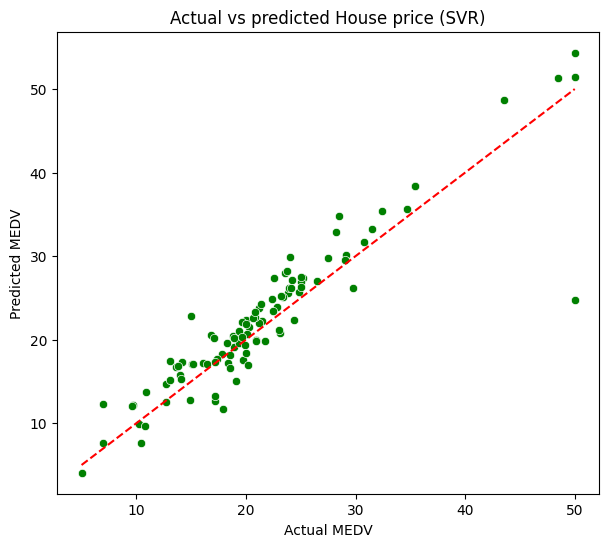

In [32]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test,y=y_pred,color='green')
plt.plot([y_test.min(),y_test.max()], [y_test.min(),y_test.max()], 'r--')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs predicted House price (SVR)')
plt.show()

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(
    n_estimators=32,
    criterion="poisson",
    max_depth=5, max_features=x_train.shape[1],
    bootstrap=True, oob_score=True, n_jobs=-1,
    random_state=42, verbose=0
)
rf.fit(x_train_scaled,y_train)



RandomForestRegressor(criterion='poisson', max_depth=5, max_features=13,
                      n_estimators=32, n_jobs=-1, oob_score=True,
                      random_state=42)

In [34]:
y_pred = rf.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", round(mae, 2))
print("Mean Squared Error:", round(mse, 2))
print("R2 Score:", round(r2, 2))

Mean Absolute Error: 2.4
Mean Squared Error: 9.14
R2 Score: 0.88


In [35]:
y_pred = rf.predict(x_train_scaled)
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print("Mean Absolute Error:", round(mae, 2))
print("Mean Squared Error:", round(mse, 2))
print("R2 Score:", round(r2, 2))

Mean Absolute Error: 1.75
Mean Squared Error: 5.54
R2 Score: 0.94


In [36]:
from xgboost import XGBRegressor
#initialize XGBOOST Regressor 
xgb=XGBRegressor(
    
    n_estimators=200,     # number of trees
    learning_rate=0.05,   # step size shrinkage
    max_depth=3,          # depth of each tree
    subsample=0.8,        # % of training data for each tree
    colsample_bytree=0.8, # % of features per tree
    random_state=42,
    reg_alpha=0.5,        # L1 regularization (lasso-like)
    reg_lambda=0.5,       # L2 regularization (ridge-like)
)
xgb.fit(x_train_scaled,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [37]:
# Predict
y_pred = xgb.predict(x_test_scaled)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", round(mae, 2))
print("Mean Squared Error:", round(mse, 2))
print("R2 Score:", round(r2, 2))

Mean Absolute Error: 2.12
Mean Squared Error: 7.6
R2 Score: 0.9


In [38]:
y_pred = xgb.predict(x_train_scaled)

# Evaluate
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print("Mean Absolute Error:", round(mae, 2))
print("Mean Squared Error:", round(mse, 2))
print("R2 Score:", round(r2, 2))

Mean Absolute Error: 1.16
Mean Squared Error: 2.25
R2 Score: 0.97
